## Part- 1

**§ Task-1 : Listen to the podcast / watch the video and write a 3-5 sentence reaction to the podcast. State in your own words what you learned, what expanding your knowledge of the topic and what you found interesting about the information you received.**


* What I learned from the podcast is that Observable is an open source platform which is helping to empower more people to work with technology and     play around with data to show their work visually. 

* Data is growing very fast and hard to read, data visualization will help humans to read fast and effectively. 

* D3 and observable plots (open source libraries) are playing a key role to display data in a visual way.

* One of the interesting parts is we can tell our own story with real data and create a dashboard which helps to make decisions faster to improve the   product quality.



**§ Task-2: Go to observablehq.com and find ONE project. With the one project please enumerate the following:
please give the title, URL and description of the project on Observable,
describe the datasets used in the project (you can just provide 1 sentence summary of the dataset),
provide a brief description of the visualizations used (1 sentence),
describe why you found this dataset / project interesting (no more than 2 sentences).**


# Project Title
************

# Netflix Data Visualizations

#### URL

##### https://observablehq.com/@dblount/netflix

### Description

This project is focused on applying visualization of data track depending on region, and how many different types of genre TV shows and movies are uploaded and viewed on the Netflix platform per year and monthly basis.

### Datasets used in project

The data set contains data collected from Netflix’s TV shows, movies, Titles, uploaded dates, movie description, Genre, cast information.

### Visualizations

For data visualization using D3.JS to capture uploads and views count in different regions to improve product quality in a faster way.

### Project Interesting

It has a large number of datasets consisting of movies and TV shows.
It has different dimensions consisting of different genres of TV shows, movies from different regions. The long format strings include movie descriptions.


## Part- 2

**§ Task: (Data Extraction, Selection and Transformation)
You will be downloading a large amount of data from FARS in preparation for analysis. For this part, you will create a Jupyter notebook, which will go to the FTP files of NHTSA.
Your Python program / notebook must do the following:
fetch to your local file system every 5th year of data starting with 1975 to 2020. That is you will automate downloading the .zip files at the static FTP site and store it locally for 1975, 1980, 1985, … 2015 and 2020.
Once you have fetched the .zip files locally, you will then unzip them automatically to a folder corresponding to their year. Thus you will have 10 folders "./1975","./1980", … which will contain the contents of their correspoding .zip file from the NHTSA.
You will notice each of these folders contain many .csv files. You will create a folder at the same level as your notebook called accident_all_years and you will copy (not move), each of the yearly files (i.e. "1975/accident.csv") to the folder "accident_all_years/1975_accident.csv". The new folder will contain just the accident.csv files for all years downloaded.**

In [1]:
import requests
import zipfile
import shutil
import os
import glob
import pandas as pd

In [2]:
BASEPATH="https://static.nhtsa.gov/nhtsa/downloads/FARS/"

if not os.path.exists("accident_all_years"):
    os.mkdir("accident_all_years")

In [3]:
for year in range(1975,2021,5):
    path=BASEPATH + str(year) + "/National/FARS" + str(year) + "NationalCSV.zip"
    print(path)
    r = requests.get(path)

    if r.status_code == 200: # HTTP OK
        data = r.content # you can also use r.content if there is binary data (or utf-8 encoded strings)
        
    with open(str(year) + ".zip", "wb") as fo:
        fo.write(data)
    
    zipfile.ZipFile(str(year) + ".zip").extractall(path=str(year))
    
    accident_file_path=str(year) + "/accident.csv"
    if not os.path.exists(accident_file_path):
        if os.path.exists(str(year) + "/accident.CSV"):
            accident_file_path=str(year) + "/accident.CSV"
            
        else:
            accident_file_path=accident_file_path.upper()
        print(accident_file_path)
        
    shutil.copy(accident_file_path, "accident_all_years/" + str(year) + "_accident.csv")
    

    

https://static.nhtsa.gov/nhtsa/downloads/FARS/1975/National/FARS1975NationalCSV.zip
1975/ACCIDENT.CSV
https://static.nhtsa.gov/nhtsa/downloads/FARS/1980/National/FARS1980NationalCSV.zip
1980/ACCIDENT.CSV
https://static.nhtsa.gov/nhtsa/downloads/FARS/1985/National/FARS1985NationalCSV.zip
1985/ACCIDENT.CSV
https://static.nhtsa.gov/nhtsa/downloads/FARS/1990/National/FARS1990NationalCSV.zip
1990/ACCIDENT.CSV
https://static.nhtsa.gov/nhtsa/downloads/FARS/1995/National/FARS1995NationalCSV.zip
1995/ACCIDENT.CSV
https://static.nhtsa.gov/nhtsa/downloads/FARS/2000/National/FARS2000NationalCSV.zip
2000/ACCIDENT.CSV
https://static.nhtsa.gov/nhtsa/downloads/FARS/2005/National/FARS2005NationalCSV.zip
2005/ACCIDENT.CSV
https://static.nhtsa.gov/nhtsa/downloads/FARS/2010/National/FARS2010NationalCSV.zip
2010/ACCIDENT.CSV
https://static.nhtsa.gov/nhtsa/downloads/FARS/2015/National/FARS2015NationalCSV.zip
https://static.nhtsa.gov/nhtsa/downloads/FARS/2020/National/FARS2020NationalCSV.zip
2020/accident.CS

In [4]:
accident_file_list = glob.glob("accident_all_years/*.csv")
print(accident_file_list)

['accident_all_years/1975_accident.csv', 'accident_all_years/1990_accident.csv', 'accident_all_years/2010_accident.csv', 'accident_all_years/1995_accident.csv', 'accident_all_years/2020_accident.csv', 'accident_all_years/2005_accident.csv', 'accident_all_years/2015_accident.csv', 'accident_all_years/1985_accident.csv', 'accident_all_years/2000_accident.csv', 'accident_all_years/1980_accident.csv']


In [5]:
data_df=pd.DataFrame()
for csv_path in accident_file_list:
    year_df=pd.read_csv(csv_path, encoding="utf-8", encoding_errors="replace")
    print(csv_path,year_df.shape)
    data_df=pd.concat([data_df,year_df])

data_df.head()


accident_all_years/1975_accident.csv (39161, 45)
accident_all_years/1990_accident.csv (39836, 48)
accident_all_years/2010_accident.csv (30296, 47)
accident_all_years/1995_accident.csv (37241, 49)
accident_all_years/2020_accident.csv (35766, 81)
accident_all_years/2005_accident.csv (39252, 53)
accident_all_years/2015_accident.csv (32538, 89)
accident_all_years/1985_accident.csv (39196, 47)
accident_all_years/2000_accident.csv (37526, 51)
accident_all_years/1980_accident.csv (45284, 45)


,STATE,COUNTY,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,VEHICLES,...,HOSP_HRNAME,HOSP_MNNAME,latitude,longitud,WEATHER1NAME,WEATHER2NAME,CF1NAME,CF2NAME,CF3NAME,TWAY_FLO
0,1,95,1,4,75,22,24,3,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,95,1,2,75,4,30,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,35,1,1,75,4,0,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,77,1,2,75,14,50,1,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,97,1,5,75,20,0,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 376096 entries, 0 to 45283
Data columns (total 113 columns):
 #    Column        Dtype  
---   ------        -----  
 0    STATE         int64  
 1    COUNTY        int64  
 2    MONTH         int64  
 3    DAY           int64  
 4    YEAR          int64  
 5    HOUR          int64  
 6    MINUTE        int64  
 7    VE_FORMS      int64  
 8    PERSONS       int64  
 9    VEHICLES      float64
 10   LAND_USE      float64
 11   CL_TWAY       float64
 12   ROAD_FNC      float64
 13   TA_1_CL       float64
 14   SP_JUR        int64  
 15   HARM_EV       int64  
 16   MAN_COLL      int64  
 17   REL_JUNC      float64
 18   REL_ROAD      int64  
 19   ROAD_FLO      float64
 20   NO_LANES      float64
 21   SP_LIMIT      float64
 22   ALIGNMNT      float64
 23   PROFILE       float64
 24   PAVE_TYP      float64
 25   SUR_COND      float64
 26   TRA_CONT      float64
 27   LGT_COND      int64  
 28   WEATHER       int64  
 29   HIT_RUN       f

## Part- 3

#### Task-1

In [7]:
#What is the overall number fatal accidents for the entire dataset period from 1975-2020? (Note: the denomenator is the total number of accidents)
#data_df.shape
print("Total number of accidents from 1975-2020 - ", len(data_df))

Total number of accidents from 1975-2020 -  376096


In [8]:
#How many people died over that period? How many total people were involved (fatal and non-fatal)?
print("Total number of people died - ", data_df["FATALS"].sum())
print("Total number of people involved - ", data_df["PERSONS"].sum())

Total number of people died -  418619
Total number of people involved -  955696


In [9]:
# What proportion of accidents occurred between 9pm and 4am (overnight)?
print("Total number of accidents occurred between 9pm and 4am - ", len(data_df[(data_df["HOUR"]>=21) | (data_df["HOUR"]<=4)]))

Total number of accidents occurred between 9pm and 4am -  134869


In [10]:
# What proportion of accidents occurred when the weather was snowy?
print("proportion of accidents occurred when the weather was snowy - ",len(data_df[(data_df["WEATHERNAME"]=="Snow") | (data_df["WEATHERNAME"]=="Blowing Snow")]))
#data_df["WEATHERNAME"].unique()

proportion of accidents occurred when the weather was snowy -  650


<AxesSubplot:xlabel='YEAR', ylabel='FATALS'>

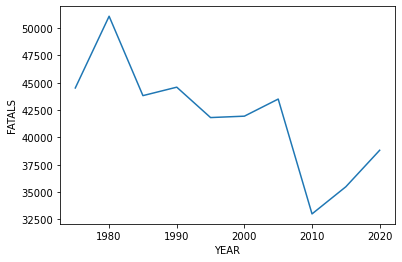

In [11]:
#Build a line graph that shows the total fatalities by year (using the dataset with just every 5 years of data).
###NOTE: I have found 3 accident records under 99
data_df.drop(data_df[data_df["YEAR"]==99].index, inplace=True)
data_df.loc[data_df["YEAR"]==75,"YEAR"]=1975
data_df.loc[data_df["YEAR"]==80,"YEAR"]=1980
data_df.loc[data_df["YEAR"]==85,"YEAR"]=1985
data_df.loc[data_df["YEAR"]==90,"YEAR"]=1990
data_df.loc[data_df["YEAR"]==95,"YEAR"]=1995
data_df.groupby("YEAR")["FATALS"].sum().plot(x="YEAR", ylabel="FATALS")
#pd.plot(fatals_by_year)

## Make a general statement about what you observe in the line graph

Overall the total number of accidents occuring starting from 1975 to 2020 is decling, The least number of accidents occured in 2010 and the highest occured in 1980

### Task-2

In [12]:
#From 1975-2020, what was the average (mean) rate of fatal accidents which involved an intoxicated driver? This would be over all states.

data_df["DRUNK_DR"].mean()

0.3550015156913946

In [22]:
len(data_df[data_df["DRUNK_DR"]>0])
data_df["DRUNK_DR"].value_counts()

0     251401
1     116584
2       7505
3        447
4         93
5         28
6          5
7          1
12         1
8          1
Name: DRUNK_DR, dtype: int64

In [14]:
#In 1975 which 5 states had the highest rate of fatal accidents involving an intoxicated driver? Which 5 had the least? Please list the states and the rates in a table in the notebook.
data_df_1975=data_df[(data_df["YEAR"]==1975) & (data_df["DRUNK_DR"]>0)]
data_df.groupby("STATE")["FATALS"].max()
data_df.groupby("STATE")["FATALS"].min()

STATE
1     1
2     1
4     1
5     1
6     1
8     1
9     1
10    1
11    1
12    1
13    1
15    0
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    0
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
53    1
54    1
55    1
56    0
Name: FATALS, dtype: int64

In [24]:
# By 1990, how much had the top and bottom 5 changed (if at all)?
data_df[data_df["YEAR"]==1990].tail()

,STATE,COUNTY,MONTH,DAY,YEAR,HOUR,MINUTE,VE_FORMS,PERSONS,VEHICLES,...,HOSP_HRNAME,HOSP_MNNAME,latitude,longitud,WEATHER1NAME,WEATHER2NAME,CF1NAME,CF2NAME,CF3NAME,TWAY_FLO
39831,56,25,12,7,1990,1,45,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39832,56,27,12,11,1990,6,25,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39833,56,29,12,6,1990,1,26,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39834,56,37,11,29,1990,13,10,2,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39835,56,5,12,27,1990,5,50,2,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# What was the average (mean) rate in 2020?
data_df[data_df["YEAR"]==2020].mean()

/tmp/ipykernel_231/2876617265.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_df[data_df["YEAR"]==2020].mean()


STATE             27.158292
COUNTY            93.059978
MONTH              6.898023
DAY               15.705645
YEAR            2020.000000
                   ...     
WEATHER2NAME            NaN
CF1NAME                 NaN
CF2NAME                 NaN
CF3NAME                 NaN
TWAY_FLO                NaN
Length: 77, dtype: float64

<AxesSubplot:xlabel='STATE'>

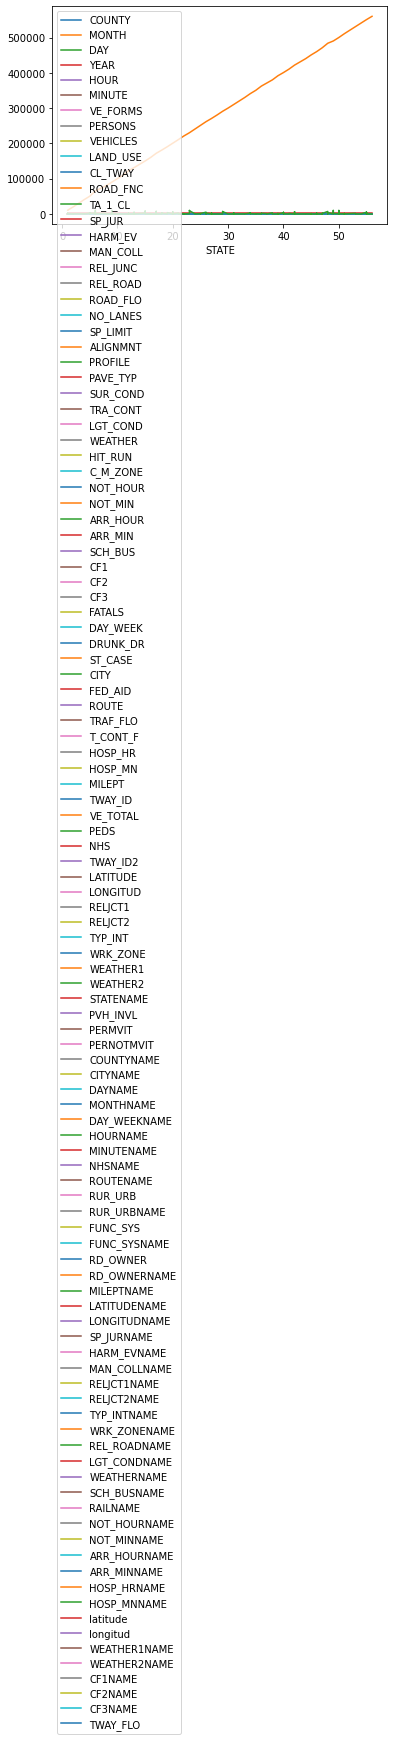

In [26]:
#Plot a graph with the top and bottom five states, #showing just the rate over time (from 1975-2020). You can plot these in two graphs (top 5 and bottom 5 do not have to be in the same graph).

data_df.groupby("STATE").tail(5).plot(x="STATE")

### What is your interpretation of the trend – pretend you have no knowledge about the changes in law, changes in BAC thresholds or changes in public messaging about DUIs.



### Task-3